In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dfs = [o for o in os.listdir('../data/trafico/measurements') if o.endswith('zip')]

In [3]:
dfs

['01-2018.zip',
 '01-2019.zip',
 '02-2018.zip',
 '02-2019.zip',
 '03-2018.zip',
 '03-2019.zip',
 '04-2018.zip',
 '05-2018.zip',
 '06-2018.zip',
 '07-2018.zip',
 '08-2018.zip',
 '09-2018.zip',
 '10-2018.zip',
 '11-2018.zip',
 '12-2018.zip']

In [4]:
# No memory for processing all dfs at once
#df = pd.concat([pd.read_csv('../data/trafico/measurements/'+csv, sep = ';') for csv in dfs])

# Processsing function

In [5]:
def processTraffic(df, long_min = -3.69 , long_max = -3.688323, lat_min = 40.426925, lat_max = 40.436925):
    df_ubications = pd.read_csv('../data/trafico/pmed_ubicacion_01-2019.csv', sep=';')
    #df_traffic = pd.read_csv('../data/trafico/01-2019.csv', sep=';')
    df_traffic = df
    df = df_traffic.merge(df_ubications, on='id', how= 'left')
    df = df[((df['longitud']>long_min) &
              (df['longitud']<long_max) &
              (df['latitud']>lat_min) &
              (df['latitud']<lat_max))]
    df['date'] = pd.to_datetime(df['fecha'])
    df.drop(columns='fecha', inplace = True)
    result = df.groupby('date')['intensidad','ocupacion','carga','vmed'].mean().resample('1h').mean()
    result = result.reset_index()
    return result

In [6]:
#df = pd.read_csv('../data/trafico/measurements/'+dfs[10], sep = ';')
#df = processTraffic(df, long_min, long_max, lat_min, lat_max)

# Batch processing

In [7]:
long_min = -3.69 
long_max = -3.688323
lat_min = 40.426925
lat_max = 40.436925

In [8]:
res = []
for csv in dfs:
    print("Current file: " + csv)
    df = pd.read_csv('../data/trafico/measurements/'+csv, sep = ';')
    df = processTraffic(df, long_min, long_max, lat_min, lat_max)
    res.append(df)

In [9]:
result = pd.concat(res)

In [14]:
result

,date,intensidad,ocupacion,carga,vmed
0,2018-01-01 00:00:00,265.500000,0.583333,6.041667,0.0
1,2018-01-01 01:00:00,987.488095,4.363095,30.392857,0.0
2,2018-01-01 02:00:00,952.214286,4.636905,32.547619,0.0
3,2018-01-01 03:00:00,534.511905,2.226190,18.511905,0.0
4,2018-01-01 04:00:00,347.791667,1.125000,10.208333,0.0
5,2018-01-01 05:00:00,301.875000,0.916667,9.166667,0.0
6,2018-01-01 06:00:00,334.291667,0.875000,9.458333,0.0
7,2018-01-01 07:00:00,295.761905,0.833333,8.970238,0.0
8,2018-01-01 08:00:00,181.982143,0.315476,5.797619,0.0
9,2018-01-01 09:00:00,157.458333,0.708333,4.666667,0.0


In [15]:
result = result.set_index('date')

In [11]:
result.to_csv('../data/result/traffic_result.csv')

# Single df example 
## Filter by latitude and longitud region

In [7]:
df_ubications = pd.read_csv('../data/trafico/pmed_ubicacion_01-2019.csv', sep=';')
#df_traffic = pd.read_csv('../data/trafico/01-2019.csv', sep=';')
df = df_traffic.merge(df_ubications, on='id', how= 'left')

In [8]:
long_min = -3.69 
long_max = -3.688323
lat_min = 40.426925
lat_max = 40.436925

In [9]:
df = df[((df['longitud']>long_min) &
              (df['longitud']<long_max) &
              (df['latitud']>lat_min) &
              (df['latitud']<lat_max))]

In [10]:
df['date'] = pd.to_datetime(df['fecha'])
df.drop(columns='fecha', inplace = True)

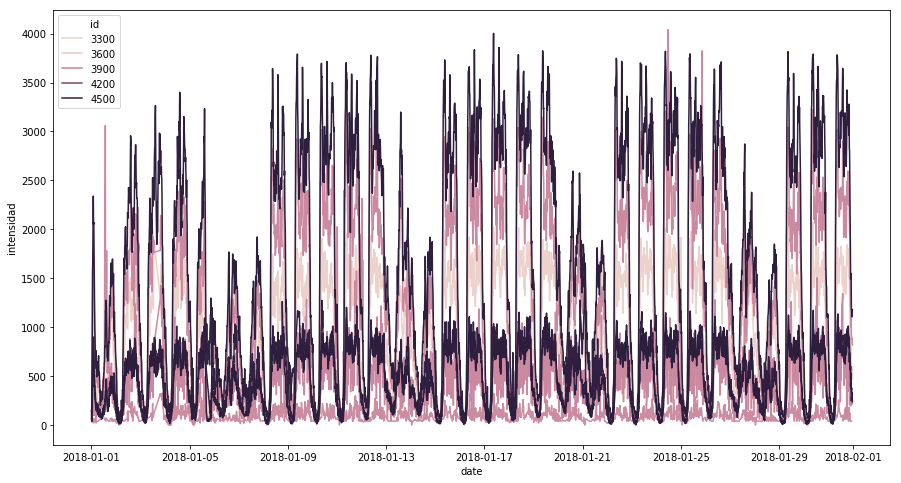

In [11]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df, x = 'date', y = 'intensidad', hue = 'id')

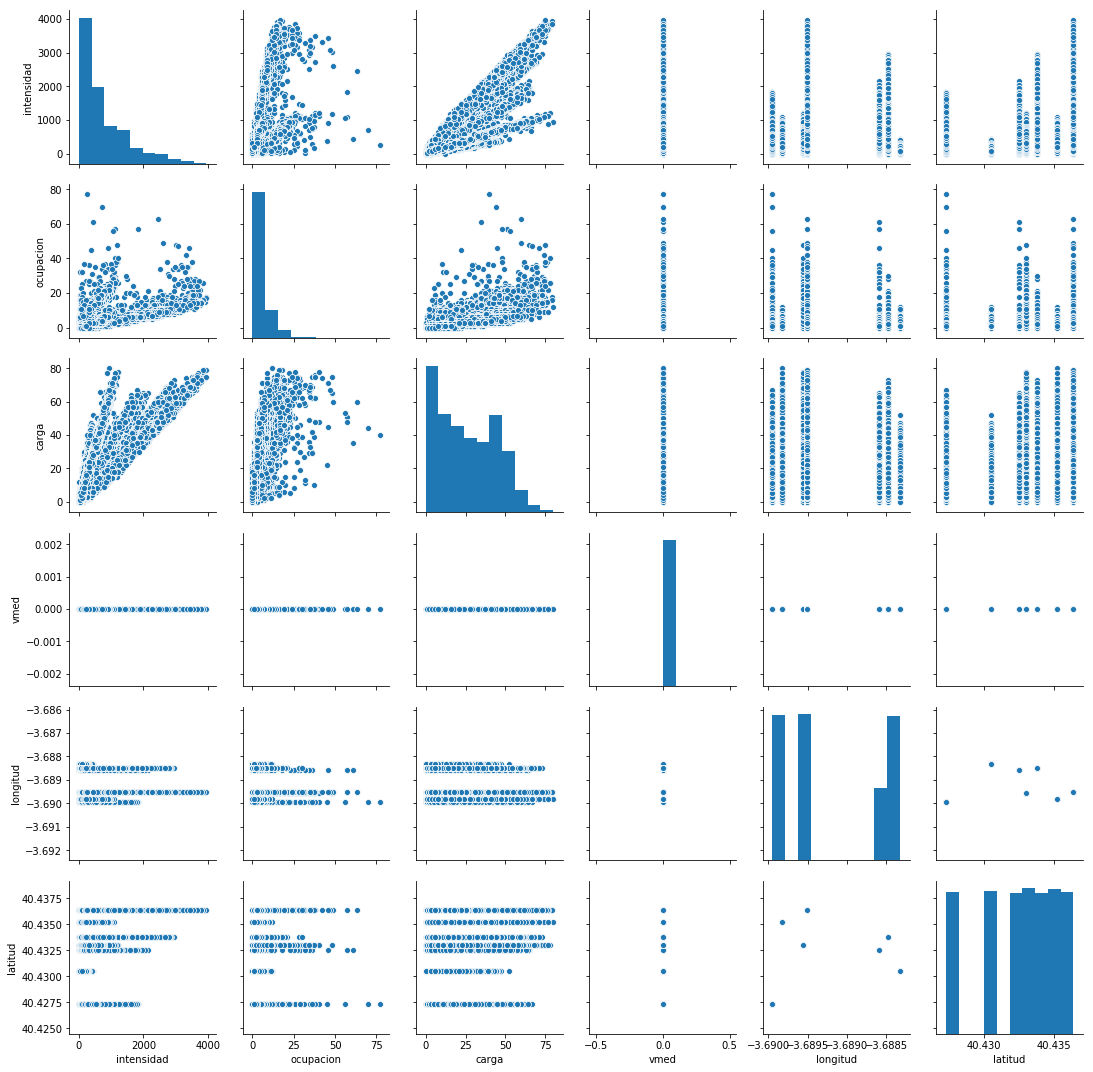

In [7]:
sns.pairplot(data = df[['intensidad','ocupacion','carga','vmed','longitud', 'latitud']])

In [12]:
result = df.groupby('date')['intensidad','ocupacion','carga','vmed'].mean().resample('1h').mean()
result

,intensidad,ocupacion,carga,vmed
date,,,,
2018-01-01 00:00:00,265.500000,0.583333,6.041667,0.0
2018-01-01 01:00:00,987.488095,4.363095,30.392857,0.0
2018-01-01 02:00:00,952.214286,4.636905,32.547619,0.0
2018-01-01 03:00:00,534.511905,2.226190,18.511905,0.0
2018-01-01 04:00:00,347.791667,1.125000,10.208333,0.0
2018-01-01 05:00:00,301.875000,0.916667,9.166667,0.0
2018-01-01 06:00:00,334.291667,0.875000,9.458333,0.0
2018-01-01 07:00:00,295.761905,0.833333,8.970238,0.0
2018-01-01 08:00:00,181.982143,0.315476,5.797619,0.0


In [13]:
result.reset_index()
#result.rename(columns= {'fecha':'date'}, inplace = True)

,date,intensidad,ocupacion,carga,vmed
0,2018-01-01 00:00:00,265.500000,0.583333,6.041667,0.0
1,2018-01-01 01:00:00,987.488095,4.363095,30.392857,0.0
2,2018-01-01 02:00:00,952.214286,4.636905,32.547619,0.0
3,2018-01-01 03:00:00,534.511905,2.226190,18.511905,0.0
4,2018-01-01 04:00:00,347.791667,1.125000,10.208333,0.0
5,2018-01-01 05:00:00,301.875000,0.916667,9.166667,0.0
6,2018-01-01 06:00:00,334.291667,0.875000,9.458333,0.0
7,2018-01-01 07:00:00,295.761905,0.833333,8.970238,0.0
8,2018-01-01 08:00:00,181.982143,0.315476,5.797619,0.0
9,2018-01-01 09:00:00,157.458333,0.708333,4.666667,0.0


In [30]:
result

,intensidad,ocupacion,carga,vmed
date,,,,
2019-01-01 00:00:00,300.595238,1.309524,7.095238,0.0
2019-01-01 01:00:00,860.857143,5.071429,27.178571,0.0
2019-01-01 02:00:00,973.964286,6.285714,33.821429,0.0
2019-01-01 03:00:00,546.285714,3.392857,19.571429,0.0
2019-01-01 04:00:00,337.107143,2.000000,12.142857,0.0
2019-01-01 05:00:00,291.785714,1.428571,9.535714,0.0
2019-01-01 06:00:00,312.535714,2.000000,9.821429,0.0
2019-01-01 07:00:00,310.375000,2.059524,10.678571,0.0
2019-01-01 08:00:00,201.059524,1.321429,6.690476,0.0


In [31]:
result.to_csv('../data/result/traffic_result.csv')